# CSE 152 Intro to Computer Vision Spring 2020 - Assignment 1
### Instructor: David Kriegman
### Assignment Published On: Friday, January 17, 2020
### Due On: Thursday, January 30th, 2020 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* All solutions must be written in this notebook
* Programming aspects of this assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you can do so. This has been provided just to provide you with a framework for the solution.
* You may use python packages for basic linear algebra (you can use numpy or scipy for basic operations), but you may not use packages that directly solve the problem unless explicitly stated.
* If you are unsure about using a specific package or function, then ask the instructor and teaching assistants for clarification.
* You must submit this notebook exported as a pdf. You must also submit this notebook as .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.
* **Late policy** - 10% per day late penalty after due date.
---

Welcome to CSE152 Intro to Computer Vision! This course gives you a comprehensive introduction to computer vison providing broad coverage including low level vision, inferring 3D properties from images, and object recognition. 
We will be using a variety of tools in this class that will require some initial configuration. To ensure smooth progress, we will setup the majority of the tools to be used in this course in this assignment. You will also practice some basic image manipulation techniques. 
Finally, you will need to export this Ipython notebook as pdf and submit it to Gradescope along with .ipynb file before the due date.

### Piazza, Gradescope and Python

**Piazza**

Go to [Piazza](https://piazza.com/ucsd/winter2020/cse152) and sign up for the class using your ucsd.edu email account. You'll be able to ask the professor, the TAs and your classmates questions on Piazza. Class announcements will be made using Piazza, so make sure you check your email or Piazza frequently.  

**Gradescope**

Every student will get an email regarding gradescope signup once enrolled in this class. All the assignments are required to be submitted to gradescope for grading. Make sure that you mark each page for different problems.  

**Python**

We will use the Python programming language for all assignments in this course, with a few popular libraries (numpy, matplotlib). Assignments will be given in the format of browser-based Jupyter/Ipython notebook that you are currently viewing. We expect that many of you have some experience with Python and Numpy. And if you have previous knowledge in Matlab, check out the [numpy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html) page. The section below will serve as a quick introduction to Numpy and some other libraries.

# Homework 1
In this homework, we will go through what we learned during the first three weeks, including basic linear algebra, least squares method, feature descriptor and matching, and bag of visual words.

You should finish this homework in this `hw1.ipynb` file using our provided templates. You can add other functions to solve the problems if necessary, but please only add them in this file.

The due date for this homework is 11:59PM, Jan 30th, Thursday. Please submit this `hw1.ipynb` to Gradescope.

# Question 1: Projection and Homogenous Coordinates (10 points)




### 1.1: Planar Projection  [7 pts]

Consider a perspective projection where a point 

$$
P = \begin{bmatrix} x\\y\\z \end{bmatrix}
$$

is projected onto an image plane $\Pi'$ represented by $k = f'>0$ as shown in the following figure.
![title](fig1.png)

The first second and third coordinate axes are denoted by $i$, $j$, $k$ respectively. 

Consider the location of points Q1 and Q2 in the world coordinate system. The locations are parameterized by the equations below:

$$
Q1 = [\text{-2, 3,-5}] + t[\text{3 6 10}]
$$
$$
Q2 = [\text{ 3,-4,-2}] + t[\text{3 6 10}]
$$
where $ t \leq -1$. 

Calculate the projection of points Q1 and Q2 onto the image plane when $ t = -1$, and the limit as t approaches $-\infty $. Identify the vanishing points of Q1 and Q2.

Q1 with t = -1 : [$\frac{f'}{3}, \frac{f'}{5}, f'$] <br> 
Q1 with t = $\infty$ : $[0.3 f', 0.6 f', f']$ <br>
Q2 with t = -1 : [0, $\frac{5 f'}{6}, f']$ <br> 
Q2 with t = $\infty$ : $[0.3 f', 0.6 f', f']$


### 1.2: Vanishing Point [3 pts]

Explain why two lines that are parallel have the same vanishing point:

Parallel line has same direction vector. For example, in the above example, the term which is multiplied by t should be the same. <br><br> When we calculate vanishing point, we divide x by z and as t approaches to $\infty$, constant term becomes negligible. Therefore, parallel line which has different staring point but same direction vector will have same vanshing point. 

# Question 2: Image Projection and Rigid Transformations [20 points]


In  this  problem  we  will  practice  rigid  body  transformations  and  image  formations  through  the pinhole perspective camera model. The goal will be to photograph the following four points 
$$^AP_1 = [\text{-1 -0.5 2}]^T$$,  $$^AP_2 = [\text{1 -0.5 2}]^T$$, $$^AP_3 = [\text{1 0.5 2}]^T$$, $$^AP_4 = [\text{-1 0.5 2}]^T$$

To do this we will need two matrices.  Recall, first, the following formula for rigid body transformation
$$
^BP = \text{ } ^B_AR\text{ }^AP + \text{ } ^BO_A
$$

Where $^BP$ is the point coordinate in the target ($B$) coordinate system. $^AP$ is the point coordinate in the source ($A$) coordinate system. $^B_AR$ is the rotation matrix from $A$ to $B$, and $^BO_A$ is the origin of the coordinate system $A$ expressed in $B$ coordinates. 

The rotation and translation can be combined into a single 4 $\times$ 4 extrinsic parameter matrix, $P_e$, so that $^BP = P_e \text{ }^AP$ where $^AP$ and $^BP$ are in homogeneous coordinates.

Once transformed, the points can be photographed using the intrinsic camera matrix, $P_i$ which is a 3 $\times$ 4 matrix.

Once these are found, the image of a point, $^BP$, can be calculated as $P_i P_e \text{ }^AP$.

We will consider four different settings of focal length, viewing angles and camera positions below. For each of these calculate:

    a) Extrinsic transformation matrix

    b) Intrinsic camera matrix under the perspective camera assumption

    c) Calculate the image of the four vertices and plot using the supplied functions

    Your output should look something like the following image (Your output values might not match, this is just an example)



![Sample Plots](example.png)

We will not use a full intrinsic camera matrix (e.g.  that maps centimeters to pixels, and defines  the  coordinates  of  the  center  of  the  image),  but  only  parameterize  this  with $f$,  the  focal
length.  In other words:  the only parameter in the intrinsic camera matrix under the perspective assumption is $f$.

1. [No rigid body transformation]. Focal  length  =  1. The  optical  axis  of  the  camera  is aligned with the z-axis.
2. [Translation]. $^BO_A = [\text{0 0 1}]^T$. Focal length = 1. The optical axis of the camera is aligned with the z-axis.
3. [Translation and Rotation]. Focal length = 1. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 1}]^T$.
4. [Translation and Rotation, long distance]. Focal length = 5. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 13}]^T$.

> You can refer the Richard Szeliski starting page 36 for image formation and the extrinsic matrix.

> Intrinsic matrix calculation for perspective camera models was covered in class and can be referred in slide 2  
https://cseweb.ucsd.edu/classes/wi20/cse152-a/lec2.pdf  


#### For your answers, you will write the extrinsic and intrinsic matrices below. After this section below we provide starter code for you to complete part c)

### 2.1: Extrinsic and Intrinsic Matrices [5 points]

Write the extrinsic and intrinsic matrices for each camera


#### Camera 1:
- $P_e$: $\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$
 
- $P_i$: $\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$

#### Camera 2:

- $P_e$: $\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 \\ 0 & 0 & 0 & 1 \end{bmatrix}$

- $P_i$: $\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$

#### Camera 3:

- $P_e$: $\begin{bmatrix} 
\frac{\sqrt{3}}{4} & -\frac{1}{4} & \frac{\sqrt{3}}{2} & 0 \\
\frac{1}{2} & \frac{\sqrt{3}}{2} & 0 & 0 \\
-\frac{3}{4} & \frac{\sqrt{3}}{4} & \frac{1}{2} & 1 \\
0 & 0 & 0 & 1 \end{bmatrix}$

- $P_i$: $\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$

#### Camera 4:

- $P_e$: $\begin{bmatrix} 
\frac{\sqrt{3}}{4} & -\frac{1}{4} & \frac{\sqrt{3}}{2} & 0 \\
\frac{1}{2} & \frac{\sqrt{3}}{2} & 0 & 0 \\
-\frac{3}{4} & \frac{\sqrt{3}}{4} & \frac{1}{2} & 1 \\
0 & 0 & 0 & 1 \end{bmatrix}$
- $P_i$: $\begin{bmatrix} 5 & 0 & 0 \\ 0 & 5 & 0 \\ 0 & 0 & 1\end{bmatrix}$


### 2.2: Image Calculation [12 points]

You are provided the following starter code as a guide to structure your code and plot the projected points. You are free to modify or use different functions for calculating the rigid transformations and the image projection but please use the plot_points() and main() functions provided.

Here is a list of the provided functions:

- to_homog(): converts points from Euclidean to homogenous coordinates
- from_homog(): converts points from homogenous coordinates back to Euclidean coordinates
- project_points(): the function that takes P_i, P_e, and the point coordinates and calculates the projection onto the camera
- camera_1(): function where you define you define your intrinsic and extrinsic parameters for each camera - there are also functions for camera 2,3,4
- plot_points(): plots the projected camera points
- main(): takes the camera coordinates


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# convert points from Euclidian to homogeneous
def to_homog(points): 
    """
    Args:
        points : (n_points, 3)
    Returns:
        (n_points, 4) : with 1 at the end 
    """
    return np.concatenate((points, np.ones((1, points.shape[1]))))

# convert points from homogeneous to Euclidian
def from_homog(points_homog):
    """
    Args:
        points_homog : (n_points, 4)
    Returns:
        (n_points, 3) : in homog
    """
    return np.array([(p / p[-1])[:-1] for p in points_homog.T]).T

# project 3D euclidian points to 2D Euclidian
def project_points(P_int, P_ext, pts):
    return from_homog(P_int @ np.eye(3, 4) @ P_ext @ to_homog(pts))

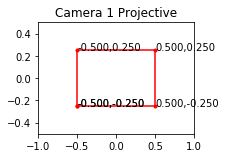

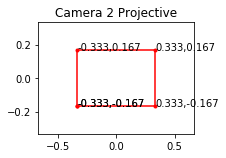

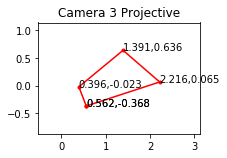

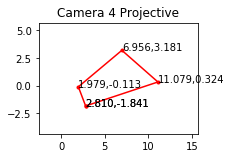

In [106]:
# Explicitly state the matrices for the four cases as described in the problem
# in the four camera functions given below. Make sure that we can see the formula
# (if one exists) being used to fill in the matrices. Feel free to document with
# comments any thing you feel the need to explain. 


def camera1():
    return np.eye(3), np.eye(4)

def camera2():
    P_i = np.eye(3)
    P_e = np.eye(4)
    P_e[2, 3] = 1
    return P_i, P_e

def camera3():
    P_i = np.eye(3)
    P_e = np.eye(4)
    P_e[0, 0] = sqrt(3) / 4
    P_e[0, 1] = -1 / 4
    P_e[0, 2] = sqrt(3) / 2
    P_e[1, 0] = 1 / 2
    P_e[1, 1] = sqrt(3) / 2
    P_e[1, 2] = 0
    P_e[2, 0] = -3 / 4
    P_e[2, 1] = sqrt(3) / 4
    P_e[2, 2] = 1 / 2
    P_e[2, 3] = 1
    return P_i, P_e

def camera4():    
    P_i = np.eye(3) * 5
    P_i[2, 2] = 1
    P_e = np.eye(4)
    P_e[0, 0] = sqrt(3) / 4
    P_e[0, 1] = -1 / 4
    P_e[0, 2] = sqrt(3) / 2
    P_e[1, 0] = 1 / 2
    P_e[1, 1] = sqrt(3) / 2
    P_e[1, 2] = 0
    P_e[2, 0] = -3 / 4
    P_e[2, 1] = sqrt(3) / 4
    P_e[2, 2] = 1 / 2
    P_e[2, 3] = 1
    
    return P_i, P_e




# Use the following code to display your outputs
# You are free to change the axis parameters to better 
# display your quadrilateral but do not remove any annotations

def plot_points(points, title='', style='.-r', axis=[]):
    
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    
    for i in range(len(points[0,inds])):
        plt.annotate(str("{0:.3f}".format(points[0,inds][i]))+","+str("{0:.3f}".format(points[1,inds][i])),(points[0,inds][i], points[1,inds][i]))
    
    if title:
        plt.title(title)
    if axis:
        plt.axis(axis)
        
    plt.tight_layout()
        
def main():
    
    point1 = np.array([[-1,-.5,2]]).T
    point2 = np.array([[1,-.5,2]]).T
    point3 = np.array([[1,.5,2]]).T
    point4 = np.array([[-1,.5,2]]).T 
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1,camera2,camera3,camera4]):
        
        P_int_proj, P_ext = camera()
        ax1 = plt.subplot(2, 2, i+1)
        plot_points(project_points(P_int_proj, P_ext, points), title='Camera %d Projective'%(i+1))#, axis=[-0.6,2.5,-0.75,0.75])
        
        ax1.margins(0.5)
        plt.show()
        
main()

### 2.3: Reverse Transformation [3 points]

If the transformation from a B frame to an A frame is given by $^AP = ^A_BR ^BP + ^AO_B$, what is the transformation to go from the A frame to the B frame?

Express your answer for homogeneous coordinates as a 4x4 matrix





Answer:



$\begin{bmatrix}
    (^A_BR^BP)^T & -^AO_B \\
    0^T & 1 \\
\end{bmatrix}
$

# Question 3: Filtering and Template Matching [15 points]

In this part, you will be implementing a series of filters, convolving them with images and observing the output. Additionally, you will look at how to utilize filters for template matching. You may use the convolve function from scipy in order to perform the convolutions. You cannot use any library functions to create the filters

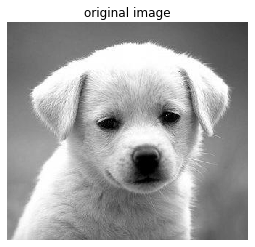

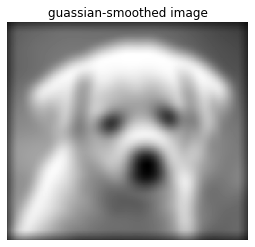

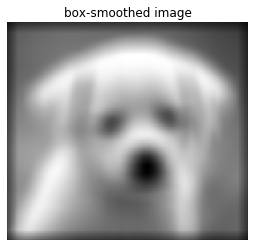

In [86]:
from scipy.signal import convolve
from skimage import filters
from imageio import imread

I = imread('dog.jpg', as_gray=True)
plt.imshow(I,cmap = 'gray')
plt.axis('off')
plt.title('original image')
plt.show()


# gaussian blurring is provided for you
def gaussian2d(filter_size=7, sig=1.0):
    """
    Creates 2D Gaussian kernel with side length `filter_size` and a sigma of `sig`.
    Source: https://stackoverflow.com/a/43346070
    """
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)


### YOUR CODE HERE ###
box_filter=np.ones((30, 30))
gauss_filter = gaussian2d(filter_size = 30, sig = 10)

### END YOUR CODE HERE ###
I_box = convolve(I, box_filter, mode='same')
I_gauss = convolve(I,gauss_filter,mode='same')

plt.imshow(I_gauss,cmap = 'gray')
plt.axis('off')
plt.title('guassian-smoothed image')
plt.show()

plt.imshow(I_box,cmap = 'gray')
plt.axis('off')
plt.title('box-smoothed image')
plt.show()

# you can play around with the filter size and 
# the sigma on the gaussian filter but be sure to submit it
# with a window = 7 and sigma = 1

## Prerequisite: Image Filtering with Box filter and a Gaussian Filter
Load the `chair.png` image and smooth it with a 5x5 box filter and a 7x7 gaussian filter. The gaussian filter will be provided for you and you will have to implement the box filter yourself.

### 3.1: Vertical Edge filter [5 points]

Implement a vertical gradient filter to extract vertical edges from the `chair.jpg` image

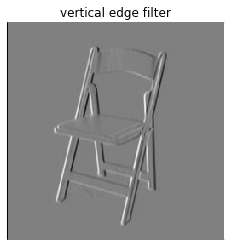

In [4]:
img = imread('chair.jpg', as_gray=True)

vert_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
y_grad_img = convolve(img, vert_filter, "same")

plt.imshow(y_grad_img,cmap = 'gray')
plt.axis('off')
plt.title('vertical edge filter')
plt.show()

### 3.2: Linearly Separable Filters [5 points]

A 2D linearly-separable convolution filter can be split into 2 distinct filters and reduce run-time. The 2D Sobel Operator:

$$ \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2\\ -1 & 0 & 1
\end{bmatrix} $$

Can be split into 2 separate 1D kernels. You will have to determine what these 1D Kernels are. There are two functions below that you will use to convolve the sobel operator with the image. In the first function, use the 2D kernel listed above. In the second function, convolve the image with the first 1D kernel, and then convolve with the second 1D Kernel. Are the outputs the same? How was the run-time affected?


-0.025


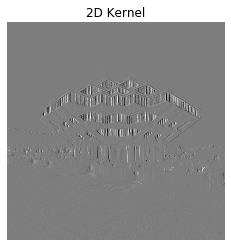

-0.0034


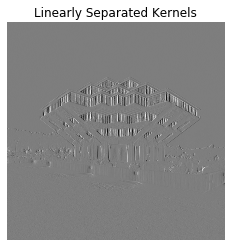

In [20]:
import time
from scipy.ndimage import convolve1d

img = imread('geisel.jpeg', as_gray=True)

def kernel_2D(img):
    
    Sobel_2D = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    
    start_time = time.time()
    I_2D = convolve(img, Sobel_2D, mode='same')
    end_time = time.time()
    
    print(np.round(start_time-end_time,4))
    plt.imshow(I_2D,cmap = 'gray')
    plt.axis('off')
    plt.title('2D Kernel')
    plt.show()
    
def kernel_sep(img):
    
    sep_1 = np.array([-1, 0, 1])
    sep_2 = np.array([1, 2, 1])
    start_time = time.time()
    I_Separated = convolve1d(convolve1d(img, sep_1, mode='constant'), sep_2, axis = 0, mode='constant')
    
    end_time = time.time()
    
    print(np.round(start_time-end_time,4))
    plt.imshow(I_Separated,cmap = 'gray')
    plt.axis('off')
    plt.title('Linearly Separated Kernels')
    plt.show()

kernel_2D(img)
kernel_sep(img)

Kernal output are the same but it's 10 times faster.

### 3.3: Filters as Templates [5 pts]

Suppose that you are a clerk at a grocery store. One of your responsibilites is to check the shelves periodically and stock them up whenever there are sold-out items. You got tired of this laborious task and decided to build a computer vision system that keeps track of the items on the shelf.

Luckily, you have learned in CSE 152A (or are learning right now) that convolution can be used for template matching: a template g is multiplied with regions of a larger image f to measure how similar each region is to the template. Note that you will want to flip the filter before giving it to your convolution function, so that it is overall not flipped when making comparisons. You will also want to subtract off the mean value of the image or template (whichever you choose, subtract the same value from both the image and template) so that your solution is not biased toward higher-intensity (white) regions.

The template of a product (template.jpg) and the image of the shelf (shelf.jpg) is provided. We will use convolution to find the product in the shelf.

<img src="template.jpg" alt="template" width="50px"/>
<img src="shelf.jpg" alt="shelf" width="600px"/>

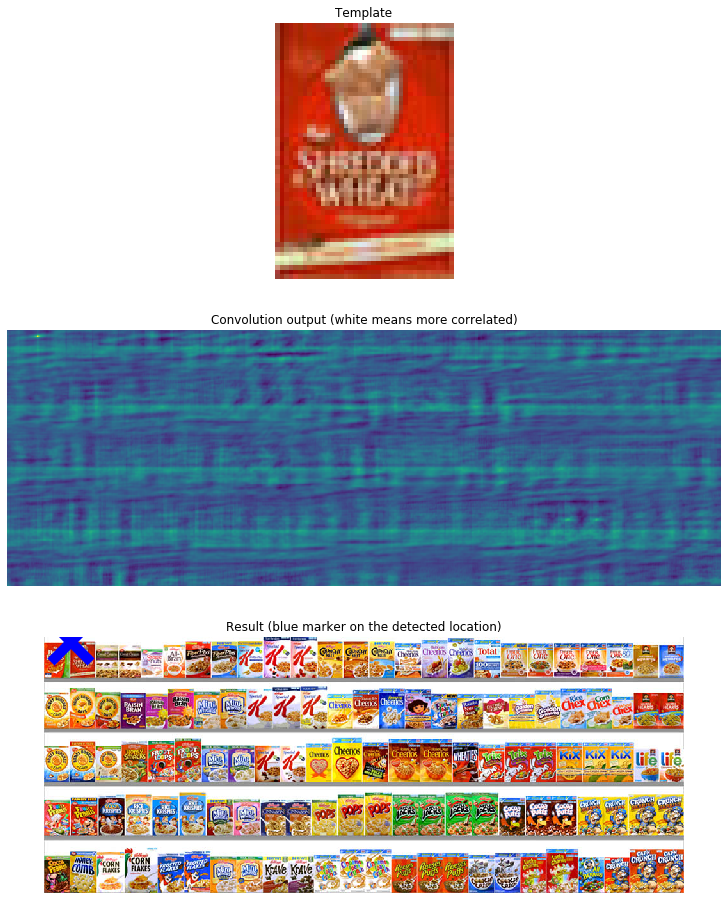

In [21]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from scipy.signal import convolve
%matplotlib inline

# Load template and image in grayscale
img = imread('shelf.jpg')
img_gray = imread('shelf.jpg', as_gray=True)
temp = imread('template.jpg')
temp_gray = imread('template.jpg', as_gray=True)

temp_gray = np.flip(temp_gray)
temp_gray -= np.average(temp_gray)

out = convolve(img_gray, temp_gray, mode="valid")

# Find the location with maximum similarity
y, x = (np.unravel_index(out.argmax(), out.shape))

# Display product template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

# Question 4: Corner Detection, Feature Descriptors and Feature Matching [20 points]


### 4.1: Corner Detection [10 points]

Corner Detection

Next, you will implement a corner detector to detect photo-identifiable features in the image.

This should be done according to http://cseweb.ucsd.edu/classes/wi20/cse152-a/lec4.pdf. You should fill in the function corner_detect with inputs image, nCorners, smoothSTD, windowSize, where smoothSTD is the standard deviation of the smoothing kernel and windowSize is the window size for Gaussian smoothing, corner detection, and non-maximum suppression. In the lecture the corner detector was implemented using a hard threshold. Do not do that; instead return the nCorners strongest corners after non-maximum suppression. You can use your previous convolution function alongside the previous Gaussian kernel function in order to smooth the image.

For each image, detect 100 corners with a Gaussian standard deviation of 2.0 and a window size of 11. For non-max suppression use a window size of 3. Display your outputs in a matplotlib figure.

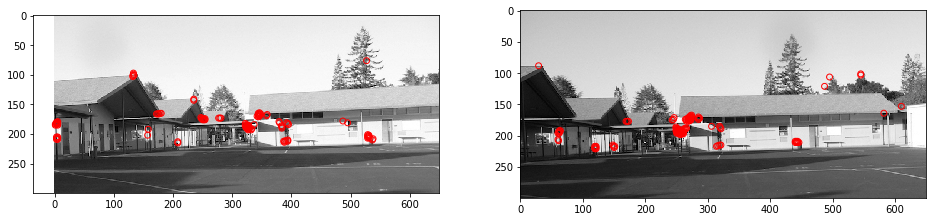

In [22]:
def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners. (290, 640)
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for Gaussian smoothing kernel, corner detector, and non maximum suppression.
        
    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2). [y, x]
    """
    gauss_filter = gaussian2d(windowSize, smoothSTD)
    image = convolve(image, gauss_filter, mode = "valid")
    
    Ix = convolve1d(image, np.array([1, 0, -1]))
    Iy = convolve1d(image, np.array([1, 0, -1]), axis = 0)
    
    saved = [] # eigenvalue, x, y
    C = np.zeros((Ix.shape[0], Ix.shape[1], 2, 2))
    sum_filter = np.ones((windowSize, windowSize))
    C[:, :, 0, 0] = convolve(Ix * Ix, sum_filter, mode = "same")
    C[:, :, 0, 1] = convolve(Ix * Iy, sum_filter, mode = "same")
    C[:, :, 1, 0] = convolve(Ix * Iy, sum_filter, mode = "same")
    C[:, :, 1, 1] = convolve(Iy * Iy, sum_filter, mode = "same")
    
    for x in range(Ix.shape[0]):
        for y in range(Ix.shape[1]):
            saved.append((min(np.linalg.eig(C[x, y])[0]), x, y))
    
    saved.sort()
    
    corners = set()
    while len(corners) != nCorners:
        unique = True
        _, cur_x, cur_y = saved.pop()
        for x in range(cur_x - 3 // 2, cur_x + 3 // 2 + 1): # 3 is used as pizza @71
            for y in range(cur_y - 3 // 2, cur_y + 3 // 2 + 1):
                # Non Maximum Suppression
                if (y, x) in corners:
                    unique = False
        if unique:
            corners.add((cur_y, cur_x))
    return np.array([np.array([y, x]) for (y, x) in corners])

# detect corners on the two provided images
# adjust your corner detection parameters here
nCorners = 100
smoothSTD = 2
windowSize = 11

# read images and detect corners on images
imgs = []
corners = []
for i in range(2):
    img = imread('almond' + str(i) + '.jpg')
    imgs.append(rgb2gray(img))
    corners.append(corner_detect(imgs[-1], nCorners, smoothSTD, windowSize))

def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(16, 16))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
    plt.show()

show_corners_result(imgs, corners)

### 4.2: Feature Matching using SIFT [10 points]

We have two overlapping images of a scene, and we would like to detect and match features (corners) across them. In order to do so, we will compute feature descriptors for the patches around the points and perform matching using a "sum of squared differences" metric.

First, you will want to implement a function which computes said metric. Given two vectors, `ssd` should return the sum of squared differences of their values:

$$ssd(v, w) = \sum_i (v_i - w_i)^2$$

In [23]:
def ssd(v1, v2):
    """Compute SSD (sum of squared differences) for two NumPy arrays.
    This function will come in handy for descriptor matching later.
    """
    return np.sum((v1 - v2) ** 2)

Now use your `ssd` function to perform feature matching. In the `SIFT_matching` function, you should extract SIFT descriptors for the patches around the corners you've detected, then give each potential pair of matching descriptors to the `ssd` function to compute the distance between them. Also make use of Lowe's nearest neighbor thresholding idea, which says that the similarity of the closest match should be much higher than the similarity of the next-closest match. You can check this using the ratio of the SSD distance with the closest match and the next-closest match. By Lowe's empirical findings, you should only accept the best match if the ratio between its distance and the second-best distance is ~0.75 or less. For better-looking results, please use a ratio of 0.3 for the purposes of this homework.

<img src="lowe.png" alt="lowe" width="500px"/>

We will use OpenCV's implementation of SIFT. To install OpenCV with pip, you can run
```
pip install opencv-python==3.4.2.16
pip install opencv-contrib-python==3.4.2.16
```
Please use this version of OpenCV, as earlier or later versions may not have everything you need. After creating a SIFT object with `cv.xfeatures2d.SIFT_create`, you should use the `sift.compute` function, not `sift.detectAndCompute` function, since we still want to use the corners that we've detected.

To summarize: in this question, you should extract SIFT descriptors for each corner. Then you should match SIFT descriptors according to an SSD metric. Check the ratio of the best match's distance to the second best match's distance and only accept the best match if it is significantly better than the next best match (i.e. it involves a significantly lower distance).

**If necessary, tune the parameters so that you end up with about 20 feature matches (starting with your 100 corners from the previous question).**

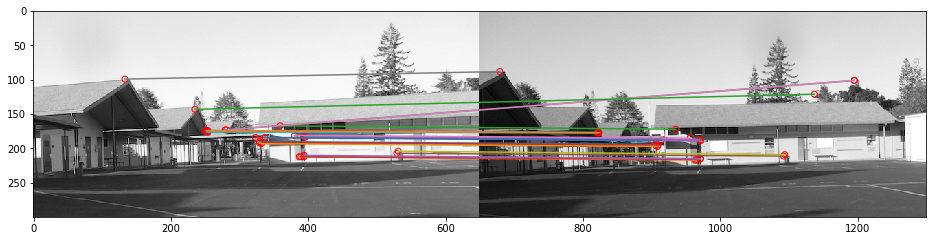

In [110]:
import cv2

def SIFT_matching(img1, img2, corners1, corners2, SSDth, nn_threshold):
    """Compute matchings between two windows based on SIFT descriptors.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        SSDth: SSD distance threshold
        NNth: nearest neighbor threshold

    Returns:
        matching result – a list of (c1, c2) tuples, where
        c1 is the 1x2 corner location in image 1, and
        c2 is the 1x2 corner location in image 2. 

    """
    
    
    
    if img1.dtype == np.float64:
        img1 = (img1 * 255.0).astype(np.uint8)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints1 = [cv2.KeyPoint(c[0], c[1], 1) for c in corners1]
    keypoints1, descriptors1 = sift.compute(img1, keypoints1)
    corners1 = [(kp.pt[0], kp.pt[1]) for kp in keypoints1]
    
    if img2.dtype == np.float64:
        img2 = (img2 * 255.0).astype(np.uint8)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints2 = [cv2.KeyPoint(c[0], c[1], 1) for c in corners2]
    keypoints2, descriptors2 = sift.compute(img2, keypoints2)
    corners2 = [(kp.pt[0], kp.pt[1]) for kp in keypoints2]
    
    matching = []

    for i in range(100):
        cur = []
        for j in range(100):
            cur.append((ssd(descriptors1[i], descriptors2[j]), keypoints1[i], keypoints2[j]))
        cur = sorted(cur, key=lambda x: x[0])
        if cur[0][0] < cur[1][0] * NNth:
            matching.append((cur[0][1], cur[0][2]))
    
    return [(m[0].pt, m[1].pt) for m in matching]

# plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(16, 16))
    plt.imshow(np.hstack((img1, img2)), cmap='gray')
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.show()

# match corners
SSDth = 50000
NNth = 0.4
matching = SIFT_matching(imgs[0]/255, imgs[1]/255, corners[0], corners[1], SSDth, NNth)
show_matching_result(imgs[0], imgs[1], matching)

---
## Submission Instructions
Remember to submit a PDF version of this notebook to Gradescope. Please make sure the contents in each cell are clearly shown in your final PDF file.

There are multiple options for converting the notebook to PDF:
1. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX
2. You can first export as HTML and then convert to PDF
3. Convert to a Latex document and use overleaf to convert to PDF (very useful if working on windows)